In [1]:
from sklearn.datasets import fetch_mldata

In [41]:
import numpy as np
import matplotlib
import matplotlib.ticker as ticker

In [6]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.


In [7]:
%matplotlib inline

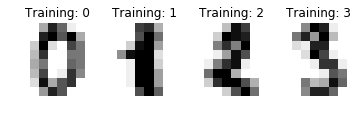

In [8]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [10]:
mnist_data_x = digits.images
mnist_data_y = digits.target

In [14]:
len(mnist_data_x)
len(mnist_data_y)

1797

In [40]:
set(mnist_data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [25]:
mnist_data_y[np.where((mnist_data_y == 2) | (mnist_data_y ==3))[0]]

array([2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3,
       2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2,
       3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2,
       3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3,
       2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2,
       3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2,

In [15]:
mnist_data_x.shape

(1797, 8, 8)

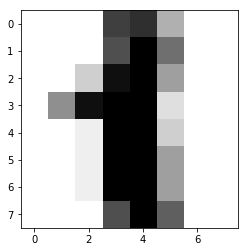

In [17]:
plt.imshow(mnist_data_x[1], cmap=plt.cm.gray_r, interpolation='nearest')

In [27]:
mnist_data_x[1].flatten()

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [30]:
data = digits.images.reshape((len(digits.images), -1))

In [31]:
data.shape

(1797, 64)

In [32]:
import itertools

In [38]:
comb = itertools.combinations(range(10),2)

In [42]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

In [44]:
class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s

<a list of 6 text.Text objects>

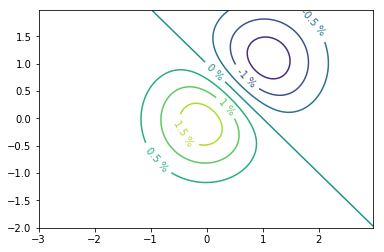

In [45]:
# Basic contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'

ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

In [47]:
X

array([[-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       ...,
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975]])

In [48]:
Y

array([[-2.   , -2.   , -2.   , ..., -2.   , -2.   , -2.   ],
       [-1.975, -1.975, -1.975, ..., -1.975, -1.975, -1.975],
       [-1.95 , -1.95 , -1.95 , ..., -1.95 , -1.95 , -1.95 ],
       ...,
       [ 1.925,  1.925,  1.925, ...,  1.925,  1.925,  1.925],
       [ 1.95 ,  1.95 ,  1.95 , ...,  1.95 ,  1.95 ,  1.95 ],
       [ 1.975,  1.975,  1.975, ...,  1.975,  1.975,  1.975]])

In [49]:
Z

array([[ 4.52063104e-06,  5.24894067e-06,  6.08697321e-06, ...,
         9.82013796e-07,  5.79256020e-07,  2.55995511e-07],
       [ 4.99294681e-06,  5.79735018e-06,  6.72294028e-06, ...,
         7.40995503e-07,  3.27884007e-07,  2.57498016e-19],
       [ 5.50772112e-06,  6.39505861e-06,  7.41607717e-06, ...,
         4.18911596e-07,  3.15943289e-19, -3.27884007e-07],
       ...,
       [ 5.97236348e-06,  6.92886625e-06,  8.02817162e-06, ...,
        -2.08885159e-02, -1.89602868e-02, -1.71885358e-02],
       [ 5.41648023e-06,  6.28368636e-06,  7.28030161e-06, ...,
        -1.99324015e-02, -1.80924123e-02, -1.64017434e-02],
       [ 4.90598951e-06,  5.69120666e-06,  6.59353913e-06, ...,
        -1.89962699e-02, -1.72426787e-02, -1.56313990e-02]])

In [60]:
import numpy as np

xlist = np.linspace(-3.0, 3.0, 3)
ylist = np.linspace(-3.0, 3.0, 4)
X, Y = np.meshgrid(xlist, ylist)

Z = np.sqrt((X)**2 + Y**2)
print(Z)

[[4.24264069 3.         4.24264069]
 [3.16227766 1.         3.16227766]
 [3.16227766 1.         3.16227766]
 [4.24264069 3.         4.24264069]]


In [67]:
Y[0]**2

array([9., 9., 9.])

In [68]:
X[0]**2

array([9., 0., 9.])

In [70]:
np.sqrt(X[0]**2 + Y[0]**2)

array([4.24264069, 3.        , 4.24264069])

In [71]:
X.shape

(4, 3)

In [63]:
Z

array([[4.24264069, 3.        , 4.24264069],
       [3.16227766, 1.        , 3.16227766],
       [3.16227766, 1.        , 3.16227766],
       [4.24264069, 3.        , 4.24264069]])

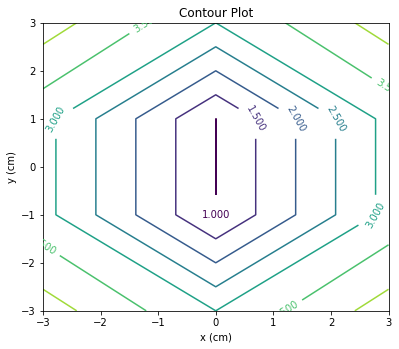

In [53]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 


Z = np.sqrt(X**2 + Y**2)
cp = ax.contour(X, Y, Z)
ax.clabel(cp, inline=True, 
          fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

In [72]:
a = np.array([[1,2,3,4],[5,6,7,8]])

In [73]:
a

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [74]:
b = np.array([[1,2],[3,4],[5,6],[7,8]])

In [75]:
b

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [76]:
np.matmul(a,b)

array([[ 50,  60],
       [114, 140]])

In [82]:
c = np.array([a[:,:2],a[:,2:4]])

In [83]:
c

array([[[1, 2],
        [5, 6]],

       [[3, 4],
        [7, 8]]])

In [84]:
d = np.array([])

In [85]:
import torch

In [87]:
a = np.random.random((2,2))

In [88]:
b = np.random.random((2,3))

In [90]:
a = torch.as_tensor(a)
b = torch.as_tensor(b)

In [94]:
c = torch.tensor((a,b))

ValueError: only one element tensors can be converted to Python scalars

In [109]:
K = np.random.random((2,2))
X = np.random.random((2,3))
mat = np.block([[X,K],[X,K]])
#mat_inv = np.linalg.inv(mat)
#mat = np.matmul(mat_inv,np.array([Y,Y]))

In [110]:
mat

array([[0.762839  , 0.56536644, 0.08452376, 0.81814442, 0.31500759],
       [0.9775981 , 0.08475654, 0.18695121, 0.94267453, 0.36276839],
       [0.762839  , 0.56536644, 0.08452376, 0.81814442, 0.31500759],
       [0.9775981 , 0.08475654, 0.18695121, 0.94267453, 0.36276839]])

In [111]:
np.array([[X,K],[X,K]])

ValueError: could not broadcast input array from shape (2,3) into shape (2)

In [102]:
x1 = np.block([X,K])
x2 = np.block([X,K])

In [104]:
np.block([[x1],[x2]])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 6 and the array at index 1 has size 5

In [105]:
x1

array([[0.45185465, 0.70787478, 0.81700835, 0.45185465, 0.70787478,
        0.81700835],
       [0.61202854, 0.64519018, 0.60812466, 0.61202854, 0.64519018,
        0.60812466]])

In [106]:
x2

array([[0.45185465, 0.70787478, 0.81700835, 0.85270929, 0.56023891],
       [0.61202854, 0.64519018, 0.60812466, 0.63372118, 0.22067791]])

In [107]:
X

array([[0.45185465, 0.70787478, 0.81700835],
       [0.61202854, 0.64519018, 0.60812466]])

In [108]:
K

array([[0.85270929, 0.56023891],
       [0.63372118, 0.22067791]])

In [112]:
x = np.array([[1],[2],[3]])

In [113]:
y = 2*x

In [120]:
y = np.array([[4],[5],[6]])

In [121]:
k = 0
for i in range(len(x)):
    for j in range(len(y)):
        k += x[i] - y[j]

In [122]:
k

array([-27])

In [123]:
sum(x) - sum(y)

array([-9])

In [125]:
np.random.random((2,1)) - np.random.random((5,1))

ValueError: operands could not be broadcast together with shapes (2,1) (5,1) 

In [126]:
a = np.array([1,1])
b = np.array([1,2])

In [127]:
np.subtract(a,b)

array([ 0, -1])